<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/CNN/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-28 11:20:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   211MB/s    in 0.3s    

2023-11-28 11:20:38 (211 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [3]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [4]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Content of base directory")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))



Content of base directory
['vectorize.py', 'validation', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [5]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#dir cats vs dogs
train_dogs_dir = os.path.join(train_dir,'dogs')
train_cats_dir = os.path.join(train_dir,'cats')

#dir validation
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [6]:
train_dogs_fnames = os.listdir(train_dogs_dir)
train_cats_fnames = os.listdir(train_cats_dir)

print(train_dogs_fnames)
print(train_cats_fnames)

['dog.430.jpg', 'dog.316.jpg', 'dog.742.jpg', 'dog.2.jpg', 'dog.485.jpg', 'dog.667.jpg', 'dog.942.jpg', 'dog.691.jpg', 'dog.804.jpg', 'dog.296.jpg', 'dog.795.jpg', 'dog.64.jpg', 'dog.205.jpg', 'dog.447.jpg', 'dog.368.jpg', 'dog.593.jpg', 'dog.85.jpg', 'dog.325.jpg', 'dog.145.jpg', 'dog.707.jpg', 'dog.638.jpg', 'dog.536.jpg', 'dog.766.jpg', 'dog.364.jpg', 'dog.775.jpg', 'dog.94.jpg', 'dog.219.jpg', 'dog.862.jpg', 'dog.675.jpg', 'dog.288.jpg', 'dog.95.jpg', 'dog.433.jpg', 'dog.644.jpg', 'dog.916.jpg', 'dog.292.jpg', 'dog.838.jpg', 'dog.568.jpg', 'dog.323.jpg', 'dog.468.jpg', 'dog.482.jpg', 'dog.239.jpg', 'dog.421.jpg', 'dog.780.jpg', 'dog.663.jpg', 'dog.27.jpg', 'dog.572.jpg', 'dog.599.jpg', 'dog.890.jpg', 'dog.821.jpg', 'dog.456.jpg', 'dog.246.jpg', 'dog.934.jpg', 'dog.612.jpg', 'dog.448.jpg', 'dog.561.jpg', 'dog.943.jpg', 'dog.255.jpg', 'dog.363.jpg', 'dog.798.jpg', 'dog.344.jpg', 'dog.803.jpg', 'dog.116.jpg', 'dog.600.jpg', 'dog.284.jpg', 'dog.441.jpg', 'dog.393.jpg', 'dog.832.jpg', '

In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

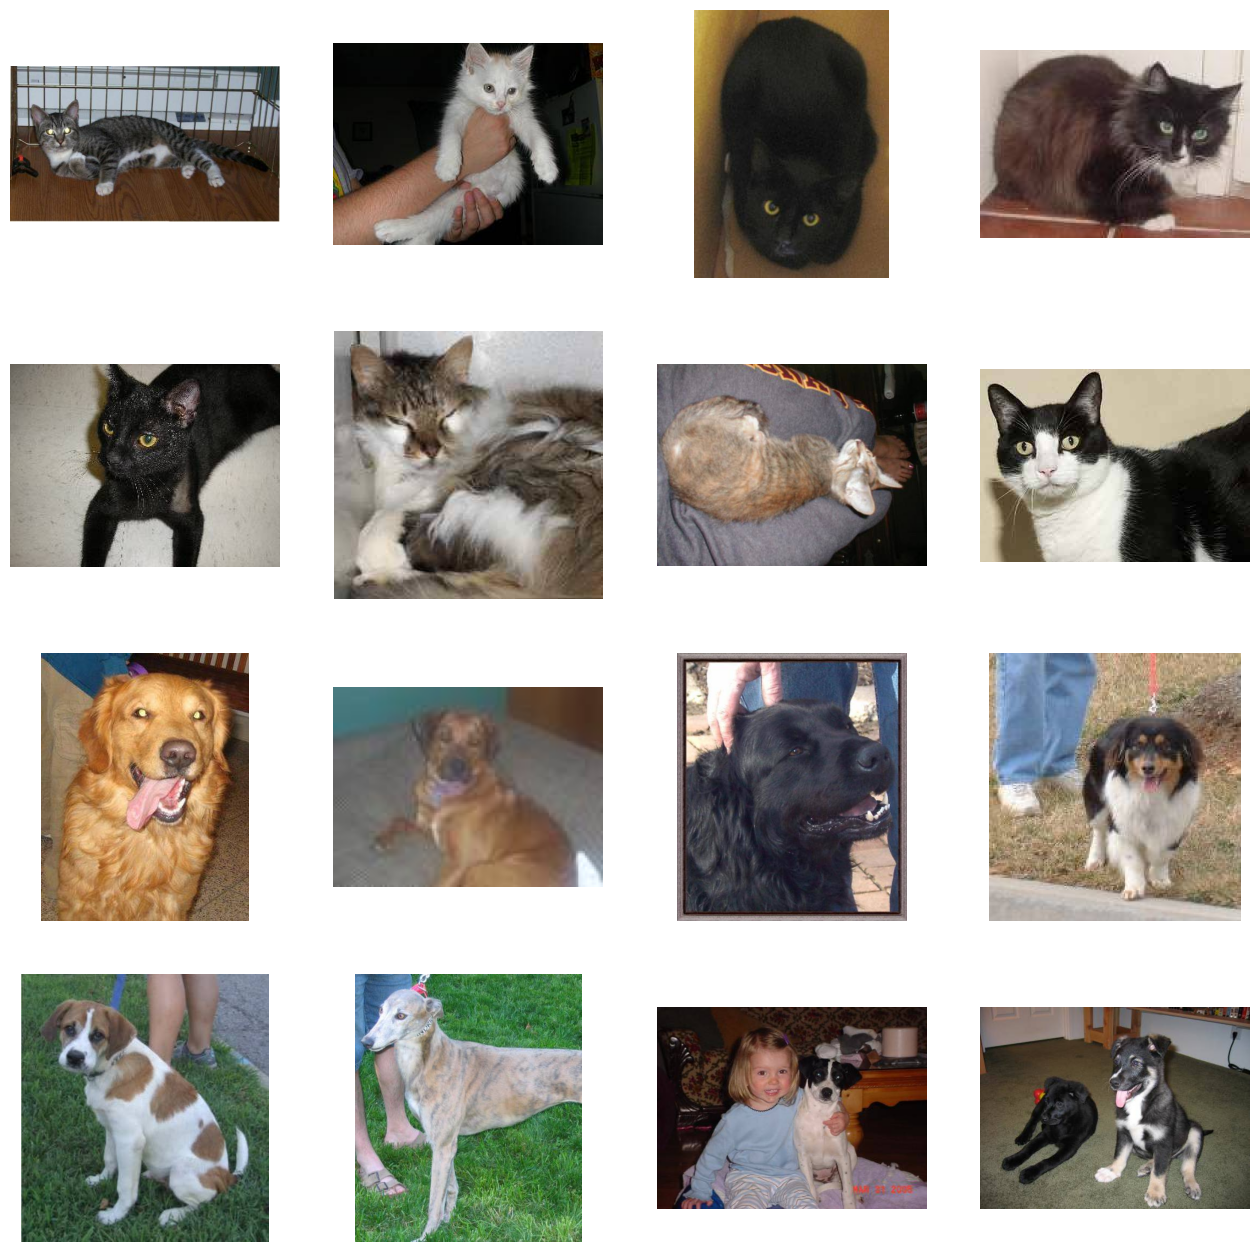

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]
                ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate (next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150)
                                                    )

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (150,150)
                                                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 10s - loss: 0.7402 - accuracy: 0.5405 - val_loss: 0.6806 - val_accuracy: 0.6610 - 10s/epoch - 102ms/step
Epoch 2/15
100/100 - 5s - loss: 0.6579 - accuracy: 0.6230 - val_loss: 0.6219 - val_accuracy: 0.6540 - 5s/epoch - 45ms/step
Epoch 3/15
100/100 - 6s - loss: 0.5927 - accuracy: 0.6730 - val_loss: 0.5935 - val_accuracy: 0.6820 - 6s/epoch - 56ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5459 - accuracy: 0.7270 - val_loss: 0.5683 - val_accuracy: 0.7010 - 5s/epoch - 47ms/step
Epoch 5/15
100/100 - 6s - loss: 0.4886 - accuracy: 0.7570 - val_loss: 1.1204 - val_accuracy: 0.5720 - 6s/epoch - 61ms/step
Epoch 6/15
100/100 - 6s - loss: 0.4457 - accuracy: 0.7870 - val_loss: 0.5687 - val_accuracy: 0.7100 - 6s/epoch - 57ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3826 - accuracy: 0.8255 - val_loss: 0.6446 - val_accuracy: 0.7020 - 5s/epoch - 53ms/step
Epoch 8/15
100/100 - 5s - loss: 0.3092 - accuracy: 0.8640 - val_loss: 0.6977 - val_accuracy: 0.7070 - 5s/epoch - 46ms/step
Epoch 9/15
10

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
# import os, signal

# os.kill(os.getpid(), signal.SIGKILL)